In [2]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt
import thinkplot

%matplotlib inline

In [4]:
fb_g = load_graph('facebook_combined.txt.gz')
ba_g = gen_BA_graph(4039, 22)

In [21]:
print(fb_g.number_of_edges(), ba_g.number_of_edges())
print(fb_g.number_of_nodes(), ba_g.number_of_nodes())

88234 88374
4039 4039


In [37]:
print(np.mean(run_SIS_simulation(fb_g, 0.3, rho_0=None, time_steps=100)[10:]))
print(np.mean(run_SIS_simulation(ba_g, 0.3, rho_0=None, time_steps=100)[10:]))
# run_SIS_simulation(fb_g, 0.3, time_steps=1000)
# run_SIS_simulation(fb_g, 0.3, time_steps=2000)
# run_SIS_simulation(ba_g, 0.3, rho_0=None, time_steps=100)

0.214148166488
0.230587879288


In [ ]:
# Experiment 1

In [8]:
trials = 100

lambdas = np.linspace(1/7, 1/22, 20) # 20 points
rhos = []

for lam in lambdas:
    print('starting lambda: ', lam)
    trial_rhos = []
    for trial in range(trials):
        trial_rhos.append(run_SIS_simulation(fb_g, lam, time_steps=50)[-1])
    rhos.append(np.mean(trial_rhos))

# lambdas_plan = {
#     1e5 : np.linspace(1/12, 1/8, 5),
#     5e5 : np.linspace(1/15, 1/10, 3),
#     1e6 : np.linspace(1/17, 1/12, 2),
#     5e6 : np.linspace(1/18, 1/15, 2),
#     8.5e6 : np.linspace(1/20, 1/19, 2),
# #     8.5e6 : [1/20]
# }

# data = {}
# for size in lambdas_plan.keys():
#     print('starting size: ', size)
#     for lam in lambdas_plan[size]:
#         print('\tstarting lamda: ', lam)
#         data[(size, lam)] = []
#         for trial in range(10):
# #             print('t', trial)
#             data[(size, lam)].append(run_SIS_simulation(g, lam, time_steps=20)[-1])
#         data[(size, lam)] = np.mean(data[(size, lam)])
rhos

starting lambda:  0.142857142857
starting lambda:  0.137730690362
starting lambda:  0.132604237867
starting lambda:  0.127477785373
starting lambda:  0.122351332878
starting lambda:  0.117224880383
starting lambda:  0.112098427888
starting lambda:  0.106971975393
starting lambda:  0.101845522898
starting lambda:  0.0967190704033
starting lambda:  0.0915926179084
starting lambda:  0.0864661654135
starting lambda:  0.0813397129187
starting lambda:  0.0762132604238
starting lambda:  0.0710868079289
starting lambda:  0.065960355434
starting lambda:  0.0608339029392
starting lambda:  0.0557074504443
starting lambda:  0.0505809979494
starting lambda:  0.0454545454545


[0.10217628125773706,
 0.09754147066105473,
 0.094773458776924974,
 0.089489972765535997,
 0.085823223570190663,
 0.081099282000495168,
 0.076684822975984168,
 0.072146570933399351,
 0.069237435008665513,
 0.064181728150532316,
 0.060713047784104968,
 0.05575885120079227,
 0.05165635058182718,
 0.047167615746471894,
 0.042329784600148551,
 0.037737063629611288,
 0.032567467194850208,
 0.027905422134191622,
 0.023030453082446153,
 0.019356276306016339]

-0.112629516738


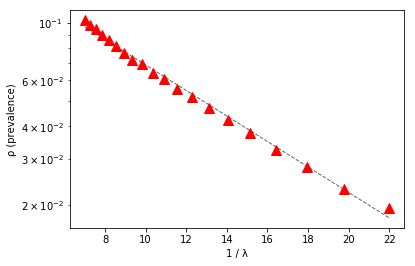

In [14]:
a, c = np.polyfit(1/lambdas, np.log(rhos), 1)
fit_xs = np.linspace(7, 22 , 100)
fit_ys = np.exp(a * fit_xs + c)
thinkplot.plot(fit_xs, fit_ys, style='--', linewidth=1, color=(.4,.4,.4), alpha=1.0)


# plot a 
shapes = ['o', '+', 's', 'x', 'v', '.']
colors = [(1., 0., 0.), (1., .5, 0.), (.5, 1., 0.), (0., 1., 0.), (0., .9, .9)]

thinkplot.plot(1/lambdas, rhos, style='^', color=colors[0], markersize=10, alpha=1.0)
thinkplot.config(yscale='log', xlabel='1 / λ', ylabel='ρ (prevalence)')

plt.savefig('figure3.png')
print(a)

In [12]:
fb_degrees = [fb_g.degree(n) for n in fb_g.nodes()]
ba_degrees = [ba_g.degree(n) for n in fb_g.nodes()]

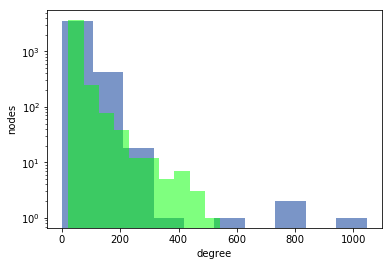

In [18]:
plt.hist(fb_degrees, color=(.26, .41, .69, .7))
plt.hist(ba_degrees, color=(0, 1, 0, .5))
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('nodes')
plt.title('')
# plt.xscale('log')
# plt.ylim(0, 5000)